# Box Plots

The following illustrates some options for the boxplot in statsmodels. These include `violin_plot` and `bean_plot`.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Bean Plots

The following example is taken from the docstring of `beanplot`.

We use the American National Election Survey 1996 dataset, which has Party
Identification of respondents as independent variable and (among other
data) age as dependent variable.

In [2]:
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = [
    "Strong Democrat",
    "Weak Democrat",
    "Independent-Democrat",
    "Independent-Independent",
    "Independent-Republican",
    "Weak Republican",
    "Strong Republican",
]

Group age by party ID, and create a violin plot with it:

Text(0, 0.5, 'Age')

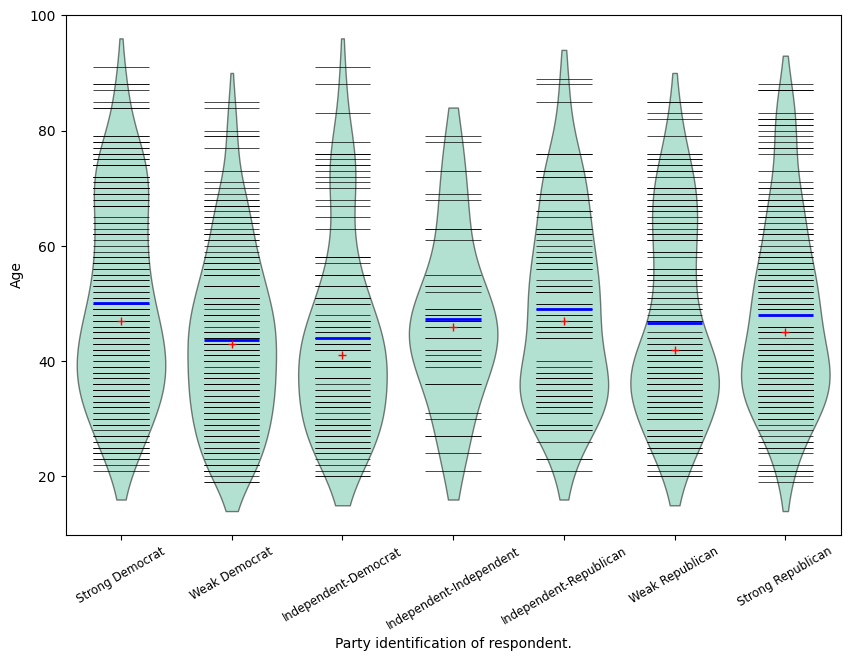

In [3]:
plt.rcParams["figure.subplot.bottom"] = 0.23  # keep labels visible
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # make plot larger in notebook
age = [data.exog["age"][data.endog == id] for id in party_ID]
fig = plt.figure()
ax = fig.add_subplot(111)
plot_opts = {
    "cutoff_val": 5,
    "cutoff_type": "abs",
    "label_fontsize": "small",
    "label_rotation": 30,
}
sm.graphics.beanplot(age, ax=ax, labels=labels, plot_opts=plot_opts)
ax.set_xlabel("Party identification of respondent.")
ax.set_ylabel("Age")
# plt.show()

In [4]:
def beanplot(data, plot_opts={}, jitter=False):
    """helper function to try out different plot options"""
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plot_opts_ = {
        "cutoff_val": 5,
        "cutoff_type": "abs",
        "label_fontsize": "small",
        "label_rotation": 30,
    }
    plot_opts_.update(plot_opts)
    sm.graphics.beanplot(
        data, ax=ax, labels=labels, jitter=jitter, plot_opts=plot_opts_
    )
    ax.set_xlabel("Party identification of respondent.")
    ax.set_ylabel("Age")

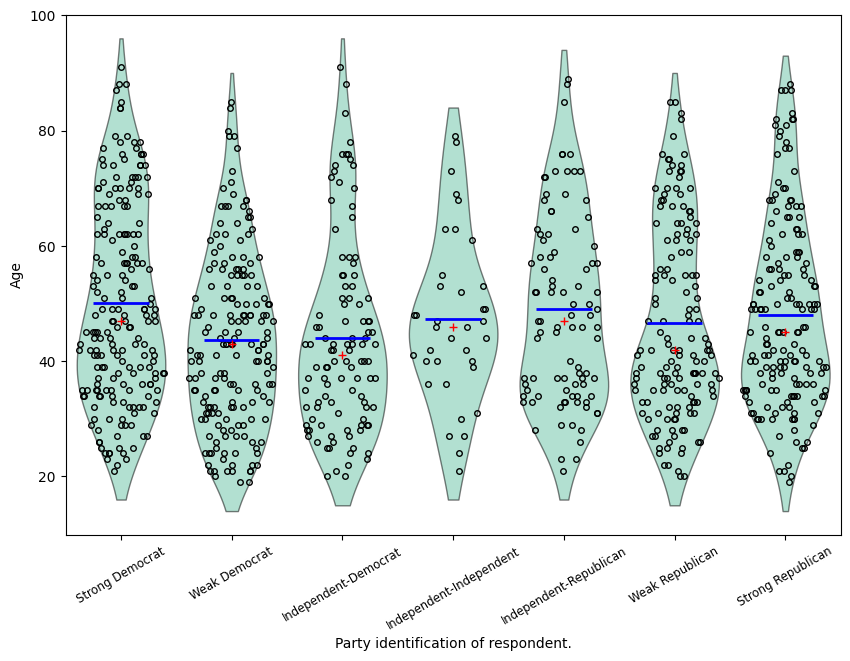

In [5]:
fig = beanplot(age, jitter=True)

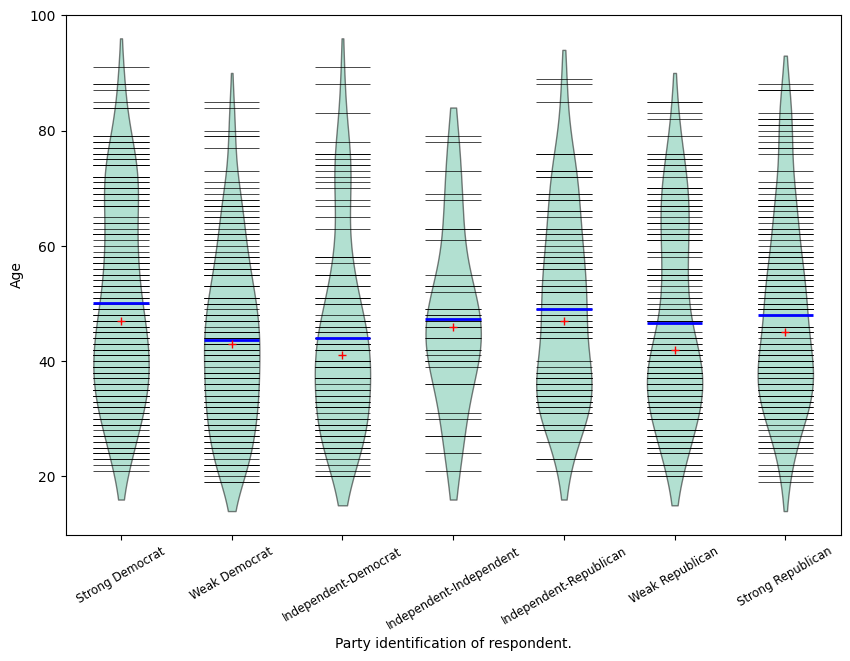

In [6]:
fig = beanplot(age, plot_opts={"violin_width": 0.5, "violin_fc": "#66c2a5"})

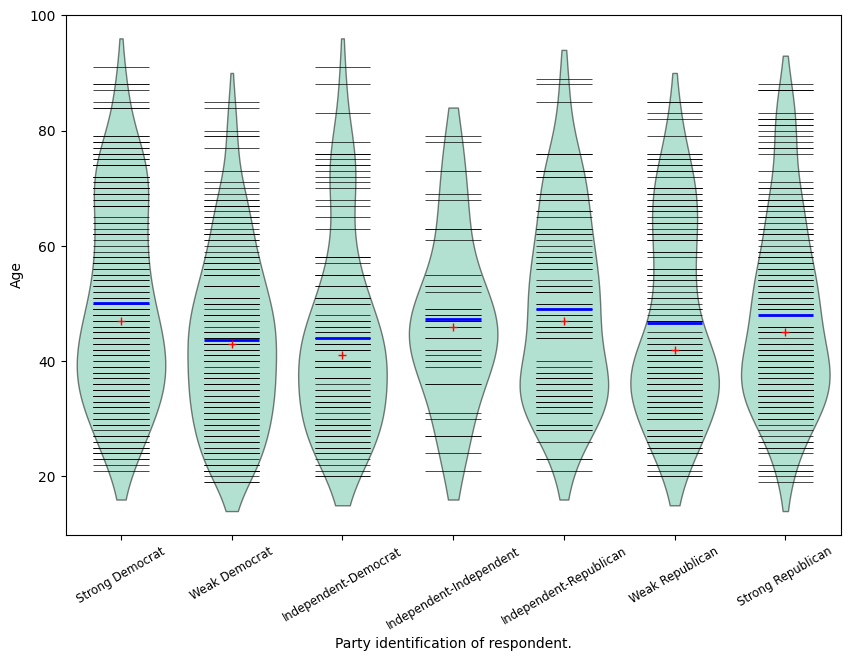

In [7]:
fig = beanplot(age, plot_opts={"violin_fc": "#66c2a5"})

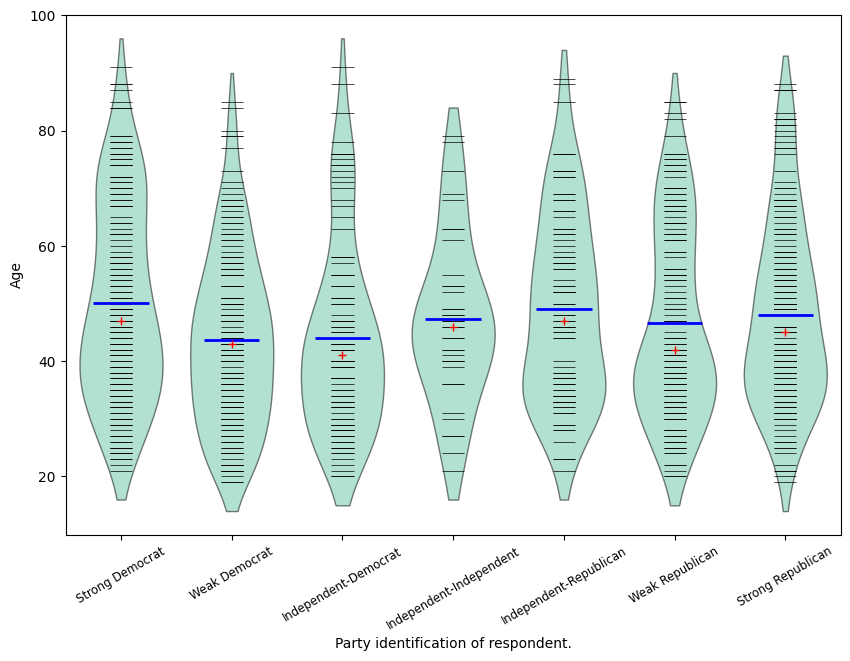

In [8]:
fig = beanplot(
    age, plot_opts={"bean_size": 0.2, "violin_width": 0.75, "violin_fc": "#66c2a5"}
)

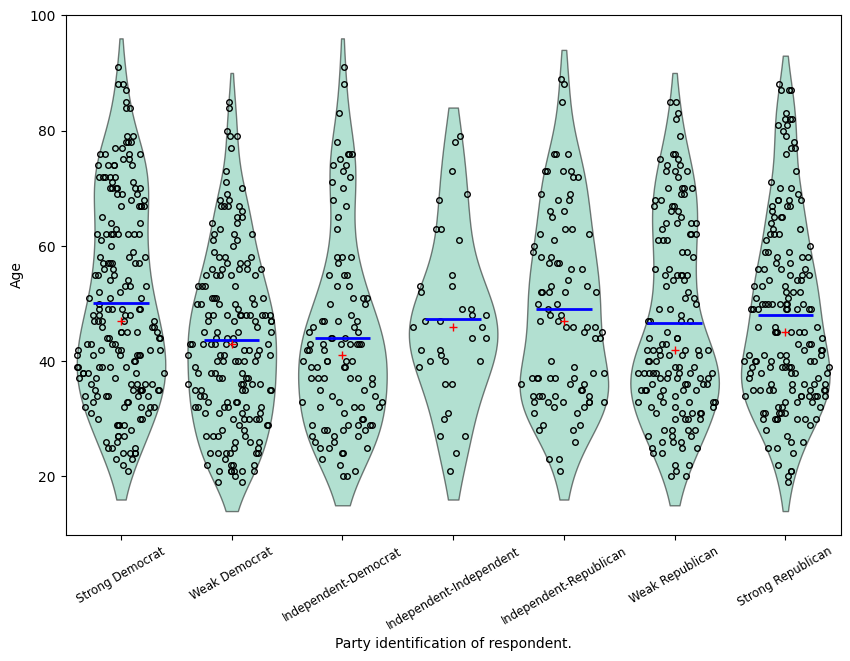

In [9]:
fig = beanplot(age, jitter=True, plot_opts={"violin_fc": "#66c2a5"})

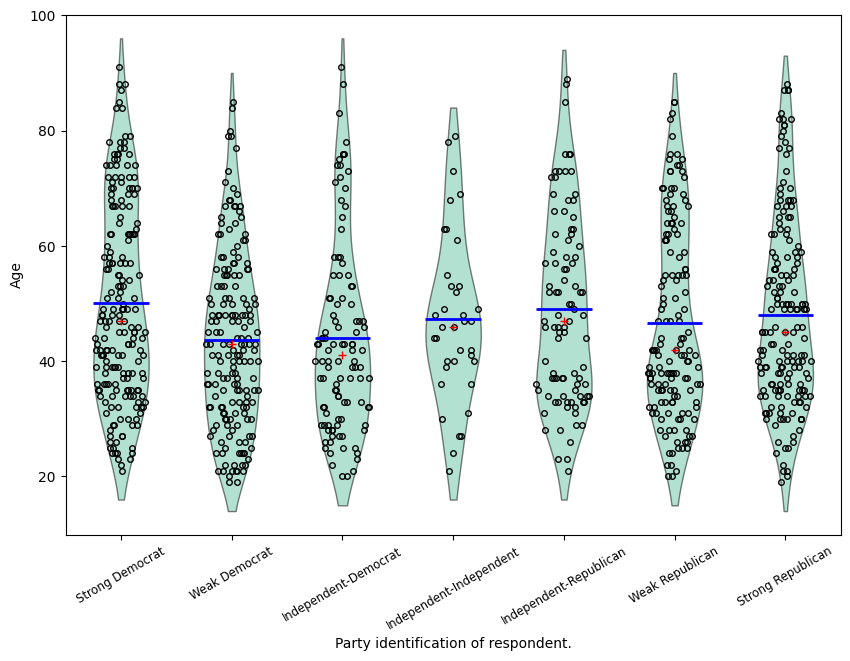

In [10]:
fig = beanplot(
    age, jitter=True, plot_opts={"violin_width": 0.5, "violin_fc": "#66c2a5"}
)

## Advanced Box Plots

Based of example script `example_enhanced_boxplots.py` (by Ralf Gommers)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm


# Necessary to make horizontal axis labels fit
plt.rcParams["figure.subplot.bottom"] = 0.23

data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = [
    "Strong Democrat",
    "Weak Democrat",
    "Independent-Democrat",
    "Independent-Independent",
    "Independent-Republican",
    "Weak Republican",
    "Strong Republican",
]

# Group age by party ID.
age = [data.exog["age"][data.endog == id] for id in party_ID]

Text(0.5, 1.0, "US national election '96 - Age & Party Identification")

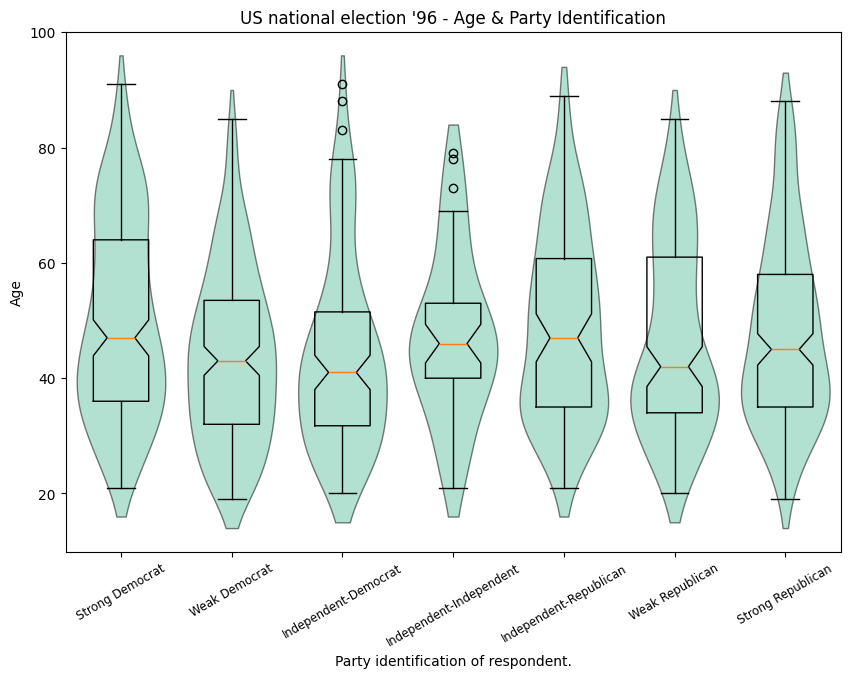

In [12]:
# Create a violin plot.
fig = plt.figure()
ax = fig.add_subplot(111)

sm.graphics.violinplot(
    age,
    ax=ax,
    labels=labels,
    plot_opts={
        "cutoff_val": 5,
        "cutoff_type": "abs",
        "label_fontsize": "small",
        "label_rotation": 30,
    },
)

ax.set_xlabel("Party identification of respondent.")
ax.set_ylabel("Age")
ax.set_title("US national election '96 - Age & Party Identification")

Text(0.5, 1.0, "US national election '96 - Age & Party Identification")

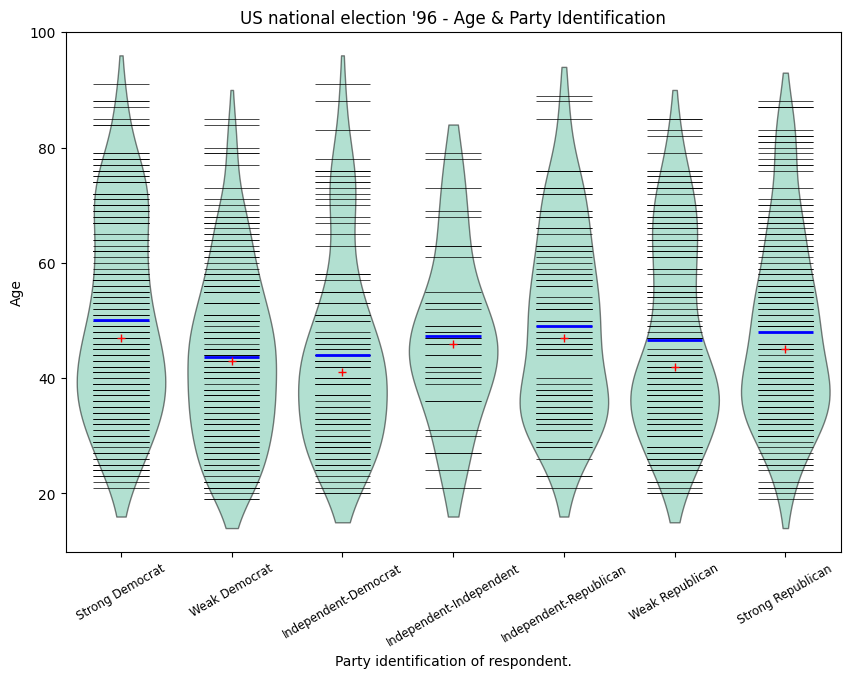

In [13]:
# Create a bean plot.
fig2 = plt.figure()
ax = fig2.add_subplot(111)

sm.graphics.beanplot(
    age,
    ax=ax,
    labels=labels,
    plot_opts={
        "cutoff_val": 5,
        "cutoff_type": "abs",
        "label_fontsize": "small",
        "label_rotation": 30,
    },
)

ax.set_xlabel("Party identification of respondent.")
ax.set_ylabel("Age")
ax.set_title("US national election '96 - Age & Party Identification")

Text(0.5, 1.0, "US national election '96 - Age & Party Identification")

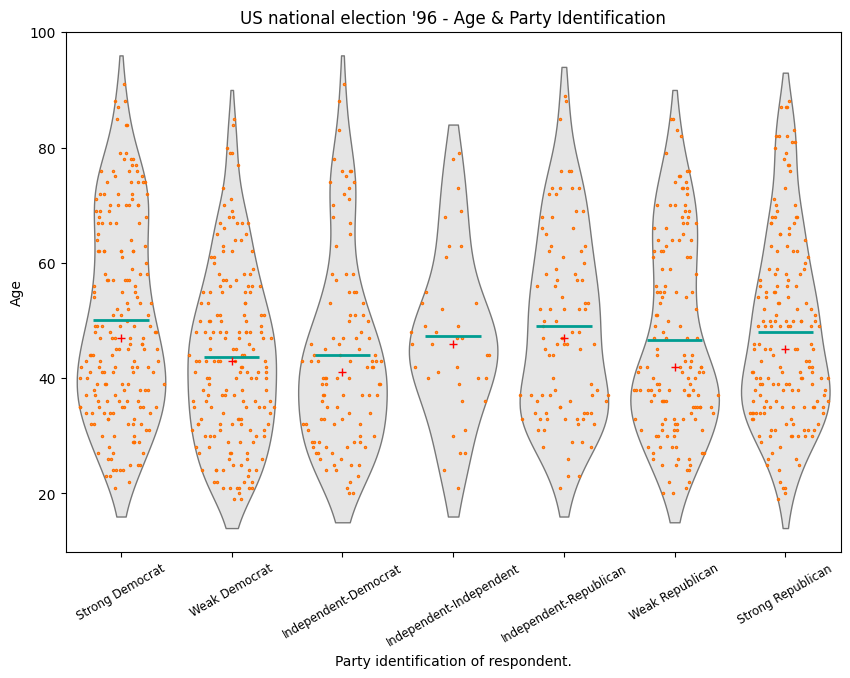

In [14]:
# Create a jitter plot.
fig3 = plt.figure()
ax = fig3.add_subplot(111)

plot_opts = {
    "cutoff_val": 5,
    "cutoff_type": "abs",
    "label_fontsize": "small",
    "label_rotation": 30,
    "violin_fc": (0.8, 0.8, 0.8),
    "jitter_marker": ".",
    "jitter_marker_size": 3,
    "bean_color": "#FF6F00",
    "bean_mean_color": "#009D91",
}
sm.graphics.beanplot(age, ax=ax, labels=labels, jitter=True, plot_opts=plot_opts)

ax.set_xlabel("Party identification of respondent.")
ax.set_ylabel("Age")
ax.set_title("US national election '96 - Age & Party Identification")

Text(0.5, 1.0, "US national election '96 - Age & Party Identification")

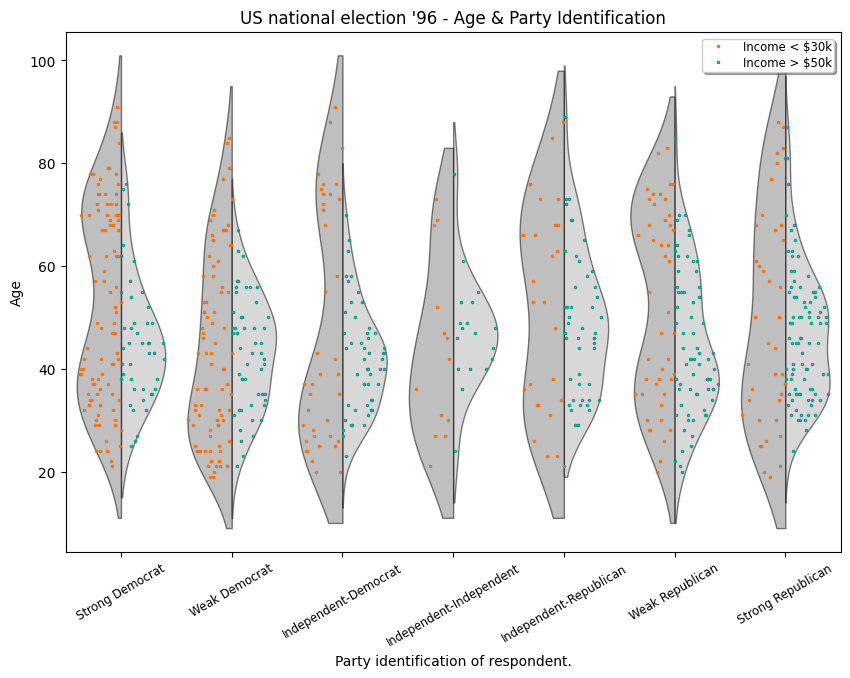

In [15]:
# Create an asymmetrical jitter plot.
ix = data.exog["income"] < 16  # incomes < $30k
age = data.exog["age"][ix]
endog = data.endog[ix]
age_lower_income = [age[endog == id] for id in party_ID]

ix = data.exog["income"] >= 20  # incomes > $50k
age = data.exog["age"][ix]
endog = data.endog[ix]
age_higher_income = [age[endog == id] for id in party_ID]

fig = plt.figure()
ax = fig.add_subplot(111)

plot_opts["violin_fc"] = (0.5, 0.5, 0.5)
plot_opts["bean_show_mean"] = False
plot_opts["bean_show_median"] = False
plot_opts["bean_legend_text"] = "Income < \$30k"
plot_opts["cutoff_val"] = 10
sm.graphics.beanplot(
    age_lower_income,
    ax=ax,
    labels=labels,
    side="left",
    jitter=True,
    plot_opts=plot_opts,
)
plot_opts["violin_fc"] = (0.7, 0.7, 0.7)
plot_opts["bean_color"] = "#009D91"
plot_opts["bean_legend_text"] = "Income > \$50k"
sm.graphics.beanplot(
    age_higher_income,
    ax=ax,
    labels=labels,
    side="right",
    jitter=True,
    plot_opts=plot_opts,
)

ax.set_xlabel("Party identification of respondent.")
ax.set_ylabel("Age")
ax.set_title("US national election '96 - Age & Party Identification")


# Show all plots.
# plt.show()